<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/06_%EC%B6%9C%EB%A0%A5%EC%B8%B5_%EC%84%A4%EA%B3%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망의 사용처
* 모든 머신러닝에 사용될 수 있다.
* 분류와 회귀를 알아보자
* 출력층의 활성화 함수에 따라서 목적(사용처)이 달라진다. ( 분류를 할지, 회귀를 할지 )
* 일반적으로 항등 함수( identity function )을 활용하면 회귀
* $softmax$ 또는 시그모이드($\sigma$)를 활용하면 분류
  * 시그모이드($\sigma$) : 이진분류
  * 소프트맥스 : 이진, 다중 분류

# 소프트맥스 함수 구현하기
$$
y_k = \frac{e^{z_k}}{\sum_{i=1}^n e^{z_i}}
$$

* $k$ : $k$번째 출력 ( 클래스 번호 ) 0, 1, 2 ....
* $z$ : 출력층에 있는 뉴런의 $WX+b$ 연산
* $n$ : 전체 클래스의 개수


In [ ]:
import numpy as np

z = np.array([0.3, 2.9, 4.0]) # 입력 신호

# 분자 부분 계산
exp_z = np.exp(z)

# 분모 계산
sum_exp_z = np.sum(exp_z) # 모든 입력 신호에 대한 지수함수의 합

# 소프트맥스를 적용한 최종 예측값
y = exp_z / sum_exp_z
print("softmax 결과 : {}".format(y))

softmax 결과 : [0.01821127 0.24519181 0.73659691]


In [ ]:
print("softmax 결과의 원소의 총 합 : {}".format(np.sum(y)))

softmax 결과의 원소의 총 합 : 1.0


# softmax의 특징
* 어떠한 실수 배열이 softmax를 지나게 되면 그 배열의 총합이 언제나 1.0이 된다.
* 총 합이 1.0 이라는 것의 특징 : 확률로써 설명이 가능하다

In [ ]:
# softmax 함수 구현하기
def softmax(a):
  # 분자
  exp_a = np.exp(a)

  # 분모
  sum_exp_a = np.sum(exp_a)

  y = exp_a / sum_exp_a
  return y

In [ ]:
softmax(z)

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
a = np.array([1010, 1000, 990])
np.exp(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([inf, inf, inf])

# 소프트맥스 함수 튜닝
* 소프트맥스 함수는 지수 함수를 사용
* 따라서 입력값이 약간만 커져도 굉장히 큰 값을 연산해야 한다.
* 예시
 * $e^{10}$ 만 되어도 20000 정도임
 * $e^{100}$ 0이 40개가 넘는 큰 숫자
 * $e^{1000}$ 무한대를 의미하는 `inf`

수학적 기교로 튜닝하기

$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C\,exp(a_k)}{C\,\sum_{i=1}^n exp(a_i)} = \frac{exp(a_k+logC)}{\sum_{i=1}^n exp(a_i+logC)} = \frac{exp(a_k+C^\prime)}{\sum_{i=1}^n exp(a_i+C^\prime)} 
$$

1. 분자 분모에 $C$라는 임의의 정수를 곱합니다.
2. $C$를 지수 함수 `exp` 안으로 옮겨서 $logC$로 만들어 준다.
3. $logC$를 $C^{\prime}$이라는 새로운 기호로 만들어 준다.

In [ ]:
# 튜닝된 소프트맥스
# C 값 구하기 -> C는 어떤 값이 와도 상관은 없으나, 일반적으로는 배열에서 가장 큰 값이 옵니다.
a = np.array([1010, 1000, 990])
c = np.max(a)

z = a-c
print(z)
print(np.exp(z) / np.sum(np.exp(z)))

[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)

  y = exp_a / sum_exp_a
  return y

np.sum(softmax(a))

1.0

# 출력층의 뉴런 수 정하기
* 출력층의 뉴런 개수는 적절하게 정해줘야 한다.
* 분류문제에서는 분류하고 싶은 클래스의 개수대로 설정하는 것이 가장 일반적
* 예시
  * 강아지, 고양이를 분류하는 모델을 만들고 싶어요
    * 클래스의 개수 : 2개
    * sigmoid를 쓰려면 뉴런의 개수가 1개
    * softmax를 쓰려면 뉴런의 개수가 2개
  * 손글씨 데이터 (MNIST)를 분류하는 모델을 만들고 싶어요
    * 클래스의 개수 : 10개 ( 0 ~ 9 까지의 숫자 )
    * 출력층의 뉴런을 10개로 설정해야 한다.
    * 활성화 함수는 softmax만 사용이 가능하다.

* 시그모이드 함수는 2진 분류에서만 사용이 가능
* 소프트맥스 함수는 2진 분류, 다중 분류에서도 사용이 가능하다. ( 가장 범용적으로 사용이 된다. )

# MNIST 손글씨 데이터셋 분류 추론 모델 만들기
* 학습은 하지 않고, 추론(predict)만 하는 모델을 만들어 보기
* `sample_weight.pkl` 파일에 학습이 완료된 가중치와 편향이 들어 있음!

## Tensorflow MNIST 데이터 불러오고 형상 다루기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# mnist 데이터셋 로딩
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


데이터의 형상 확인하기. ✨✨✨

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

One Hot Encoding이 되어있었다면 y_train의 shape은?? `(60000, 10)`

In [ ]:
y_train[:3] # one hot encoding이 안되어 있는 상태 

array([5, 0, 4], dtype=uint8)

In [ ]:
y_train_one_hot = tf.one_hot(y_train, 10) # 10 : 숫자는 10개니까 
print(y_train_one_hot.shape)
print(y_train_one_hot[:3])

(60000, 10)
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)


### 데이터 확인하기
* 이미지 데이터는 이미지를 표시하는 것

In [ ]:
# 첫 번째 이미지 데이터 가져와서 시각화로 확인하기
image = X_train[0]
image.shape

(28, 28)

`C(Channel)` 데이터가 없기 때문에 `grayscale(흑백채널)` 이미지 라는 것을 알 수 있다.

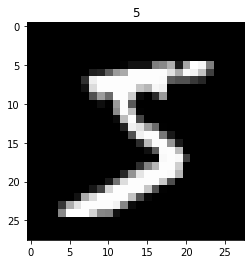

In [ ]:
# matplotlib을 이용한 이미지 시각화
plt.imshow(image, 'gray')
plt.title(y_train[0])
plt.show()

데이터를 신경망에 집어 넣을 준비 - 훈련과 학습, 테스트 모두 동일한 shape을 가져야 한다. **각 데이터를 모두 1차원 형식으로 집어넣어야 한다.**

하나의 데이터를 1차원 배열( 벡터 )로 받는 신경망
* 신경망 - Dense Layer ( 신경망 기술적인 표현으로 이야기 할 때 )
* 기하학 - Affine Transformation ( Affine Layer )
* 종합적 - Fully Connected Layer - 완전 연결 계층이란 표현으로 많이 사용

-----
신경망에 1장의 이미지 데이터를 입력할 수 있는 경우 확인하기 - shape을 확인하기
* 몇 장인지에 대한 정보 없이 **세로 픽셀, 가로 픽셀만 있는 상황** : `(28, 28)` -> X
* 몇 장인지에 대한 정보 없이 **이미지 정보를 평탄화 한 상황** : `(784, )` -> O
----
신경망에 N장의 이미지 데이터를 입력할 수 있는 경우 확인하기
* 몇 장인지에 대한 정보가 존재하는 형태로 **세로 픽셀, 가로 픽셀의 정보가 있는 상황** : `(N, 28, 28)` -> X
* 몇 장인지에 대한 정보가 존재하는 형태로 **이미지 정보를 평탄화 한 상황** : `(N, 784)` -> O
----
결론적으로 입력되는 데이터의 차원이 (N, M) 이면 신경망( F.C 레이어 )에 집어 넣을 수 있다.
* `N` : 데이터의 개수 ( N장의 이미지 )
* `M` : 데이터의 스칼라의 개수
  * 데이터의 개수를 이야기를 안 하면 (1개의 데이터에 대한 이야기) : `(M, )` 또는 `(1, M)`
  * 데이터의 개수를 이야기 하면 ( N개의 데이터에 대한 이야기 ) : `(N, M)`
----
참고로 CNN은 Fully Conneected Layer가 아니고, 특징 추출( Feature Extraction )이라는 과정으로써, 단순한 2차원 데이터가 아닌, `(N, H, W, C)`가 입력 데이터의 모양이 됩니다.

## 신경망에 들어가는 형태로 이미지 배열 편집하기

In [ ]:
# 1. flatten()을 활용한 평탄화
image = X_train[0].flatten()
image.shape

(784,)

In [ ]:
# 2. ravel()을 이용한 평탄화
image = np.ravel(X_train[0])
image.shape

(784,)

ravel()을 활용한 평탄화는 잘 사용되지 않습니다. 왜? 원본 이미지 데이터에 훼손이 우려되기 때문에

In [ ]:
# 3. reshape을 활용한 평탄화 : 원하는 방식으로 자유롭게 바꾸고자 할 때 사용할 수 있다.
#  reshape을 활용하면 데이터의 개수 까지 한꺼번에 고려하면서 평탄화를 시킬 수가 있다. (N, M) 형식을 만들기가 편하다.
#  제일 많이 사용되는 방법
#  Tensorflow에서 Flatten() 레이어가 reshape 평탄화와 비슷한 역할을 해준다.

image = X_train[0].reshape(-1)
image.shape

(784,)

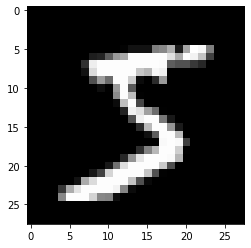

In [ ]:
# 평탄화된 이미지를 원래대로 복구
image_bokgu = image.reshape(28, 28)
plt.imshow(image_bokgu, 'gray')
plt.show()

In [ ]:
# 여러 장의 이미지를 reshape을 활용해서 한꺼번에 평탄화 하기
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_reshaped = X_train.reshape(60000, -1)
X_train_reshaped.shape

(60000, 784)

In [ ]:
# 개발자 적인 방법을 이용하면... : 상숫값을 그대로 쓰는 것을 지양합니다.( 소민호 스타일 )
IMAGE_COUNT = X_train.shape[0] # 이미지 개수를 가져오기

X_train_reshaped = X_train.reshape(IMAGE_COUNT, -1)
X_train_reshaped.shape

(60000, 784)

MNIST 신경망 만들기 - F.C.L

In [ ]:
def sigmoid(x):
  return 1 / ( 1 + np.exp(-x) )

def get_test_data():
  # 테스트 데이터만 가져오기
  _, (X_test, y_test) = mnist.load_data()
  
  IMAGE_COUNT = X_test.shape[0] # 이미지 개수 ( X_test.shape -> (10000, 28, 28) )

  X_test_reshaped = X_test.reshape(IMAGE_COUNT, -1)

  return X_test_reshaped, y_test

# 이미 학습이 완료된 신경망 매개변수(W, b) 가져오기 sample_weight.pkl
def init_network():
  import pickle
  with open("./sample_weight.pkl", "rb") as f:
    network = pickle.load(f)
  
  return network

def predict(network, x):
  # network는 dict
  # network에 각 매개변수가 들어 있습니다.
  # W1, W2, W3 - 가중치
  # b1, b2, b3 - 편향

  # 복붙 하지 마시고, 뭘 해야 할지 계획을 먼저 세우고 ( 설계 ), 그 계획에 따라서 코딩을 하시면 되요
  # 물론 한줄한줄 왜 썼는가를 생각하면서 주석을 한줄한줄 적어주시길 바랄게요

  '''
    층별 가중치와 편향이 들어있는 network에서 가중치와 편향을 꺼낸다.
    network는 predict 함수의 매개변수에 존재한다.

    1층의 가중치 : W1, b1
    2층의 가중치 : W2, b2
    3층의 가중치 : W3, b3

    1층과 2층에서는 sigmoid를 활성화 함수로 사용하고
    출력층인 3층에서는 softmax를 활성화 함수로 사용
  '''
  # network에서 가중치와 편향 꺼내기
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  # 1층 구현 - 1층에 입력 되는 것 : x, 가중치 : W1, 편향 b1, 활성화 함수 : sigmoid, 출력 A1
  z1 = np.dot(x, W1) + b1
  a1 = sigmoid(z1)

  # 2층 구현 - 2층에 입력 되는 것 : a1, 가중치 : W2, 편향도 b2, 활성화 함수 : sigmoid, 출력 A2
  z2 = np.dot(a1, W2) + b2
  a2 = sigmoid(z2)

  # 3층 구현 - 3층에 입력 되는 것 : a2, 가중치 : W3, 편향 b3, 활성화 함수 : softmax, 출력 y
  z3 = np.dot(a2, W3) + b3
  y = softmax(z3)

  return y

In [ ]:
anetwork = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

W1.shape, W2.shape, W3.shape

((784, 50), (50, 100), (100, 10))

In [ ]:
network = init_network()
X, y = get_test_data()
pred_result = predict(network, X[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
np.argmax(pred_result)

7

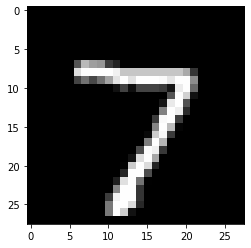

In [ ]:
plt.imshow(X[0].reshape(28, 28), 'gray')
plt.show()

In [ ]:
y_test[0]

7

In [ ]:
# X_test[0] --> 7의 모양을 하고 있는 이미지
test_image = X_test[0]
test_image.shape

(28, 28)

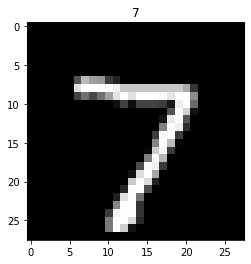

In [ ]:
plt.title(y_test[0])
plt.imshow(test_image, 'gray')
plt.show()

위의 코드는 정답 확인용 코드

In [ ]:
# 예측하기
pred_image = X_test[0]

# predict를 할 수 있는 모양으로 만들어 봐야겠죠
pred_image_reshaped = pred_image.reshape(-1)
pred_image_reshaped.shape

(784,)

In [ ]:
pred_result = predict(network, pred_image_reshaped)
pred_result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([4.2879005e-06, 4.5729317e-07, 1.8486280e-04, 8.3605024e-05,
       1.5084674e-07, 6.3182205e-07, 4.5782045e-10, 9.9919468e-01,
       3.8066935e-07, 5.3083024e-04], dtype=float32)

위 softmax 결과물에서 제일 높은 값의 인덱스가 이 신경망이 예측한 클래스가 된다.

In [ ]:
# np.argmax 함수를 이용하면 배열에서 가장 큰 값을 가지고 있는 인덱스를 리턴
np.argmax(pred_result)

7

* `pred_image`는 7의 모양을 한 이미지
* `y_test[0]`은 `pred_image`의 정답. 7
* `pred_result`는 `pred_image`의 softmax 결과물
* `np.argmax(pred_result)`를 이용하여 가장 확률이 높은 인덱스를 확인해 보니 7
* 즉 예측이 잘 됐다.

# 배치 (BATCH)
배치란 데이터의 묶음
* 일반 배치
  * 데이터를 순서대로 묶은 것
  * 데이터가 모자라거나 적당하게 모아낸 경우
* 미니 배치
  * 데이터를 랜덤하게 뽑아서 묶은 것
  * 빅 데이터 같은 데이터의 양(Data Volume)이 엄청나게 큰 경우
  * 엄청나게 많은 데이터를 모두 사용해서 훈련을 한다면 시간이 매우 많이 걸림
  * **랜덤하게 몇 개의 데이터를 선정해서 훈련**

In [ ]:
# 배치를 사용하지 않고, 전체 테스트 데이터에 대한 정확도를 확인
X, y = get_test_data()

network = init_network()
accuracy_count = 0 # 정답을 맞춘 개수를 저장
total_count = X.shape[0] # 전체 데이터의 개수

for i in range(len(X)):
  pred = predict(network, X[i]) # pred의 shape : 1개씩 10개로의 예측을 했으니까 (10, )
  pred = np.argmax(pred) # 확률이 가장 높은 원소의 인덱스

  # 예측한 것과 정답이 같으면
  accuracy_count += ( pred == y[i] ) # True면 1이 accuracy_count에 더해지고, False면 0이 더해짐

print(float(accuracy_count / len(X)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9207


위 코드의 단점
* 10,000장의 이미지를 한장씩 예측을 하고 있다.
* 시간이 오래걸린다는 이야기

어떻게 해결할 수 있을까?
* **배치(BATCH)**를 사용해서 한장씩이 아닌, 데이터의 묶음으로 예측을 하게 하겠다.
* 배치란? 데이터의 뭉터기

In [ ]:
# 배치를 사용한 예측 구현하기
X, y = get_test_data()

network = init_network()

# 배치란? 데이터의 묶음
# batch_size : 1 배치당 들어있어야 하는 데이터의 개수
# ex) 60,000개의 데이터를 batch_size 100으로 묶으면 몇개의 배치가 만들어 질까요? 600개의 배치가 만들어 집니다.

batch_size= 100
accuracy_count = 0

# batch를 활용한 예측 구현
for i in range(0, len(X), batch_size):
  X_batch = X[i : i + batch_size]
  pred_batch = predict(network, X_batch) # pred_batch의 shape : (100, 10) 100장의 이미지지에 대한 각각의 10개씩 예측 결과
  # argmax를 당연히 써야지 -> 100장의 이미지에서 각각 가장 높은 확률이 들어있는 인덱스를 추출
  pred_batch = np.argmax(pred_batch, axis=1) # 여기에 들어갈 코드는..?

  accuracy_count += np.sum(pred_batch == y[i : i + batch_size])

print(float(accuracy_count / len(X)))

0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


`np.argmax`의 `axis`가 1인 이유

1. softmax의 결과는 10개의 원소(결과물)를 가진 1차원 배열
2. 그런데, 이 결과물이 100개씩 묶음 지어져 있다.(왜? 배치 때문에... 100장씩 넣었으니까 100개씩 10개의 결과물이 있는 것)
3. 따라서 `np.argmax`의 `axis`를 스칼라가 추가되는 방향인 1로 줘야지만 각 이미지별 최댓값의 인덱스를 구할 수 있다.
4. `axis=0`은 1차원 배열이 추가되는 이미지 장수에 대한 방향이기 때문에...

1. numpy
2. 활성화 함수
3. 다차원 배열 연산
4. 다차원 배열과 신경망
5. 출력층 설계

진도는 오늘은 여기까지만 할게요. 나머지 시간은 질답시간
1. axis
2. 출력층 설계 중에 어떤거
3. **뭘 공부해야 하는지** best 질문?
4. 어떻게 활용되어지는지가 궁금하실거 같은데
5. 제 과정에서 최종적으로 구현될 각종 컨텐츠
6. 배치가 만들어지고 계산 되어지는 과정

16:00 까지 각자 질문거리 만들어서 채팅으로 보내주세요

* On / Off 출석이 결정이 되어있는데 자율
* 웬만하면 귀찮아도 나오세요 - 아무래도 질문이랑 공부 하느데 있어서 온라인보다 오프라인이 더 쉬우니까.
* 나와서 질문 안하지 말고 뽑아먹을거 다 뽑아가셍
* ㅇㅋ?

